# Launch!  
1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).  
2. Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.  
    - Beware of slow degradation too: models tend to "rot" as data evolves.   
    - Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).  
    - Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is  particulary important for online learning systems.  
3. Retrain your models on a regular basis on fresh data (automate as much as possible). 

# Model deployment
Time to deploy our model and make it online in the world.

Checklist:

- [ ] Pick the best model out of RF and NN
- [ ] Save the model
- [ ] Organize it into a pipeline
- [ ] Heroku
- [ ] CircleCI
- [ ] Testing - PYTEST / TOX
- [ ] Gemfury
- [ ] Packaging
- [ ] Docker
- [ ] GUnicorn
- [ ] Keras, Theano, Tensorflow
- [ ] Bash scripts




In [19]:
from fmi import FMI
f = FMI(place='Kumpula')
# f.observations() returns a list of Observation -objects for the last X hours.

In [20]:
obs = f.observations()

In [21]:
import json

In [60]:
obs

[<Observation: 2020-05-12T00:00:00+00:00 - nan C>,
 <Observation: 2020-05-12T07:10:00+00:00 - 7.4 C>,
 <Observation: 2020-05-12T07:20:00+00:00 - 7.7 C>,
 <Observation: 2020-05-12T07:30:00+00:00 - 7.7 C>,
 <Observation: 2020-05-12T07:40:00+00:00 - 8.3 C>,
 <Observation: 2020-05-12T07:50:00+00:00 - 8.6 C>,
 <Observation: 2020-05-12T08:00:00+00:00 - 8.8 C>,
 <Observation: 2020-05-12T08:10:00+00:00 - 9.0 C>,
 <Observation: 2020-05-12T08:20:00+00:00 - 8.3 C>,
 <Observation: 2020-05-12T08:30:00+00:00 - 8.2 C>,
 <Observation: 2020-05-12T08:40:00+00:00 - 8.3 C>,
 <Observation: 2020-05-12T08:50:00+00:00 - 8.8 C>,
 <Observation: 2020-05-12T09:00:00+00:00 - 8.3 C>,
 <Observation: 2020-05-12T09:10:00+00:00 - 8.0 C>,
 <Observation: 2020-05-12T09:20:00+00:00 - 8.9 C>,
 <Observation: 2020-05-12T09:30:00+00:00 - 9.3 C>,
 <Observation: 2020-05-12T09:40:00+00:00 - 9.1 C>,
 <Observation: 2020-05-12T09:50:00+00:00 - 7.8 C>,
 <Observation: 2020-05-12T10:00:00+00:00 - 8.8 C>,
 <Observation: 2020-05-12T10:10

In [36]:
a = obs[18].__dict__

In [45]:
import pandas as pd
import numpy as np

In [46]:
pd.DataFrame(a, np.arange(1))

,time,temperature,wind_speed,wind_gust,wind_direction,humidity,cloud_coverage,pressure,dew_point,precipitation,precipitation_1h,weather_symbol,radiation_global_accumulation,radiation_long_wave_accumulation,radiation_netsurface_long_wave_accumulation,radiation_netsurface_short_wave_accumulation,radiation_diffuse_accumulation
0,2020-05-12 10:00:00+00:00,8.8,6.5,9.6,198.0,59.0,62.5,1002.1,1.3,0.0,0.0,0,None,None,None,None,None


In [50]:
f_obj = FMI(place='Kumpula')
forecast = f_obj.forecast()
#make it into a dataframe
df = pd.DataFrame()
for i,observation in enumerate(forecast):
    df_temp = pd.DataFrame(observation.__dict__, index=np.arange(i,i+1))
    df = pd.concat([df,df_temp], axis=0)

In [51]:
df

,time,temperature,wind_speed,wind_gust,wind_direction,humidity,cloud_coverage,pressure,dew_point,precipitation,precipitation_1h,weather_symbol,radiation_global_accumulation,radiation_long_wave_accumulation,radiation_netsurface_long_wave_accumulation,radiation_netsurface_short_wave_accumulation,radiation_diffuse_accumulation
0,2020-05-12 20:00:00+00:00,4.09,3.54,5.51,254.0,71.65,0.00,1005.31,-2.33,1.2,0.0,1,9009384.0,7152722.5,-2875886.00,7701332.0,3602944.00
1,2020-05-12 21:00:00+00:00,2.98,2.85,4.41,254.0,80.26,0.00,1005.41,-1.25,1.2,0.0,1,9010379.0,7983046.0,-3231524.50,7701332.0,3604997.50
2,2020-05-12 22:00:00+00:00,2.16,2.49,3.83,260.0,87.72,0.00,1005.39,-0.37,1.2,0.0,1,9007702.0,8801218.0,-3589016.50,7703156.5,3601700.25
3,2020-05-12 23:00:00+00:00,1.31,1.57,2.29,267.0,93.97,0.00,1005.35,0.11,1.2,0.0,1,9007702.0,9612409.0,-3945645.25,7700500.5,3601700.25
4,2020-05-13 00:00:00+00:00,0.59,0.31,0.68,349.0,96.85,44.42,1005.31,-0.02,1.2,0.0,2,9007702.0,10423037.0,-4295274.50,7701139.5,3601700.25
5,2020-05-13 01:00:00+00:00,0.62,1.31,1.90,89.0,96.77,88.72,1005.21,-0.01,1.2,0.0,3,9011313.0,11241098.0,-4630518.50,7699659.0,3606155.00
6,2020-05-13 02:00:00+00:00,0.99,1.99,2.83,128.0,95.46,100.00,1004.88,0.09,1.2,0.0,3,9010075.0,12082521.0,-4939853.50,7697456.0,3604917.50
7,2020-05-13 03:00:00+00:00,1.68,2.25,3.24,124.0,91.66,99.95,1004.69,0.00,1.2,0.0,3,9185155.0,12985150.0,-5196538.50,7837156.0,3771953.75
8,2020-05-13 04:00:00+00:00,2.90,2.39,3.66,115.0,88.67,100.00,1004.34,0.57,1.2,0.0,3,9665326.0,13930724.0,-5423014.50,8235644.5,4259324.00
9,2020-05-13 05:00:00+00:00,5.08,3.72,6.02,124.0,81.04,100.00,1003.82,0.97,1.2,0.0,3,10286889.0,15004081.0,-5554624.50,8759805.0,4881035.00


In [52]:
df.columns

Index(['time', 'temperature', 'wind_speed', 'wind_gust', 'wind_direction',
       'humidity', 'cloud_coverage', 'pressure', 'dew_point', 'precipitation',
       'precipitation_1h', 'weather_symbol', 'radiation_global_accumulation',
       'radiation_long_wave_accumulation',
       'radiation_netsurface_long_wave_accumulation',
       'radiation_netsurface_short_wave_accumulation',
       'radiation_diffuse_accumulation'],
      dtype='object')

In [53]:
cols = ['time', 'temperature', 'wind_speed', 'wind_direction',
       'humidity', 'cloud_coverage', 'pressure', 'dew_point', 'precipitation',
       'precipitation_1h', 'radiation_global_accumulation']
df = df[cols]

In [63]:
temp = df.radiation_global_accumulation.diff()/3600

In [64]:
temp.loc[1:]

1       0.276389
2      -0.743611
3       0.000000
4       0.000000
5       1.003056
6      -0.343889
7      48.633333
8     133.380833
9     172.656389
10    190.630000
11    203.169722
12    141.208611
13    106.129722
14    196.252222
15    490.107222
16    621.617778
17    649.313889
18    607.924444
19    487.746667
20    347.825000
21    183.169444
22     60.212778
23      9.020000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29     -1.010000
30     -0.148889
31     46.376667
32    150.492222
33    258.926667
34    395.541111
35    516.393889
Name: radiation_global_accumulation, dtype: float64

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [59]:
X_train = pd.read_csv('../datasets/scaled_train_test/X_train_standard.csv', delimiter=',')
X_test = pd.read_csv('../datasets/scaled_train_test/X_test_standard.csv', delimiter=',')
y_train = X_train['Value (kWh)']
y_test = X_test['Value (kWh)']
X_train.drop(['Value (kWh)'], axis=1, inplace=True)
X_test.drop(['Value (kWh)'], axis=1, inplace=True)

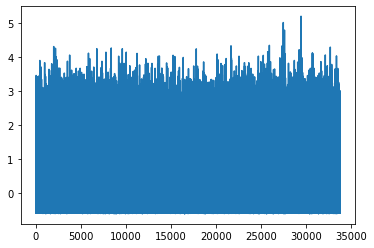

In [60]:
X_train['Global radiation (W/m2)'].plot()